In [ ]:
!pip install pandas_datareader

In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
#Define the starting and the ending point
start = '2010-01-01'
end = '2019-12-31'

df = data.DataReader('AAPL', 'stooq', start, end)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-31,71.0084,71.9246,70.9077,71.9176,1.030855e+08
2019-12-30,70.8938,71.6864,69.8549,71.3983,1.472306e+08
2019-12-27,71.3015,71.9974,70.5647,70.9755,1.494081e+08
2019-12-26,69.7592,71.0214,69.7303,71.0034,9.527219e+07
2019-12-24,69.7273,69.7762,69.2907,69.6226,4.948450e+07


In [3]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-08,6.40586,6.45421,6.36458,6.45401,5.246856e+08
2010-01-07,6.44444,6.45421,6.36409,6.41085,5.588893e+08
2010-01-06,6.52639,6.55241,6.41553,6.42221,6.452991e+08
2010-01-05,6.53905,6.56358,6.49230,6.52639,7.055130e+08
2010-01-04,6.49958,6.53008,6.46597,6.51522,5.764890e+08


In [4]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume
0,2019-12-31,71.0084,71.9246,70.9077,71.9176,1.030855e+08
1,2019-12-30,70.8938,71.6864,69.8549,71.3983,1.472306e+08
2,2019-12-27,71.3015,71.9974,70.5647,70.9755,1.494081e+08
3,2019-12-26,69.7592,71.0214,69.7303,71.0034,9.527219e+07
4,2019-12-24,69.7273,69.7762,69.2907,69.6226,4.948450e+07


In [11]:
print(df.dtypes)

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object


In [12]:
#df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df = df.reset_index()
df.head()

,index,Date,Open,High,Low,Close,Volume
0,2515,2010-01-04,6.49958,6.53008,6.46597,6.51522,5.764890e+08
1,2514,2010-01-05,6.53905,6.56358,6.49230,6.52639,7.055130e+08
2,2513,2010-01-06,6.52639,6.55241,6.41553,6.42221,6.452991e+08
3,2512,2010-01-07,6.44444,6.45421,6.36409,6.41085,5.588893e+08
4,2511,2010-01-08,6.40586,6.45421,6.36458,6.45401,5.246856e+08


In [13]:
df = df.drop(['index'], axis=1)
df.head()

,Date,Open,High,Low,Close,Volume
0,2010-01-04,6.49958,6.53008,6.46597,6.51522,5.764890e+08
1,2010-01-05,6.53905,6.56358,6.49230,6.52639,7.055130e+08
2,2010-01-06,6.52639,6.55241,6.41553,6.42221,6.452991e+08
3,2010-01-07,6.44444,6.45421,6.36409,6.41085,5.588893e+08
4,2010-01-08,6.40586,6.45421,6.36458,6.45401,5.246856e+08


In [14]:
df = df.drop(['Date'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,6.49958,6.53008,6.46597,6.51522,5.764890e+08
1,6.53905,6.56358,6.49230,6.52639,7.055130e+08
2,6.52639,6.55241,6.41553,6.42221,6.452991e+08
3,6.44444,6.45421,6.36409,6.41085,5.588893e+08
4,6.40586,6.45421,6.36458,6.45401,5.246856e+08


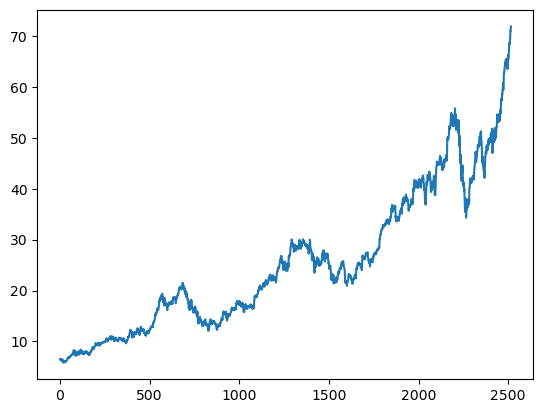

In [15]:
plt.plot(df.Close)

In [16]:
df.shape

(2516, 5)

# Adding Indicators and plot the visulaization

In [17]:
#Moving Average for 100 days
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    58.078106
2512    58.317804
2513    58.548341
2514    58.778101
2515    59.002407
Name: Close, Length: 2516, dtype: float64

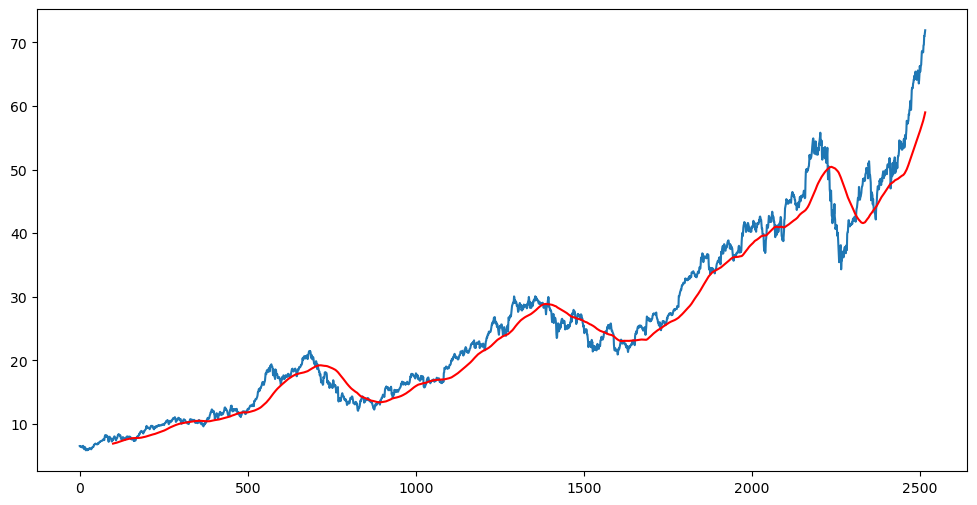

In [20]:
#Visualizing the Price Action along with Moving Average for 100 days
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [21]:
#Moving Average for 200 days
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    52.899952
2512    53.034801
2513    53.167063
2514    53.298542
2515    53.430315
Name: Close, Length: 2516, dtype: float64

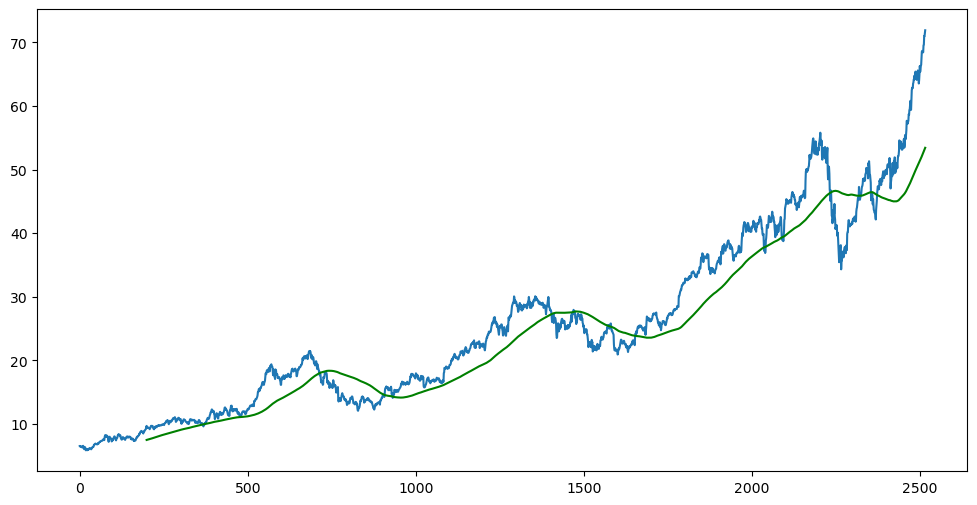

In [22]:
#Visualizing the Price Action along with Moving Average for 200 days
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200, 'g')

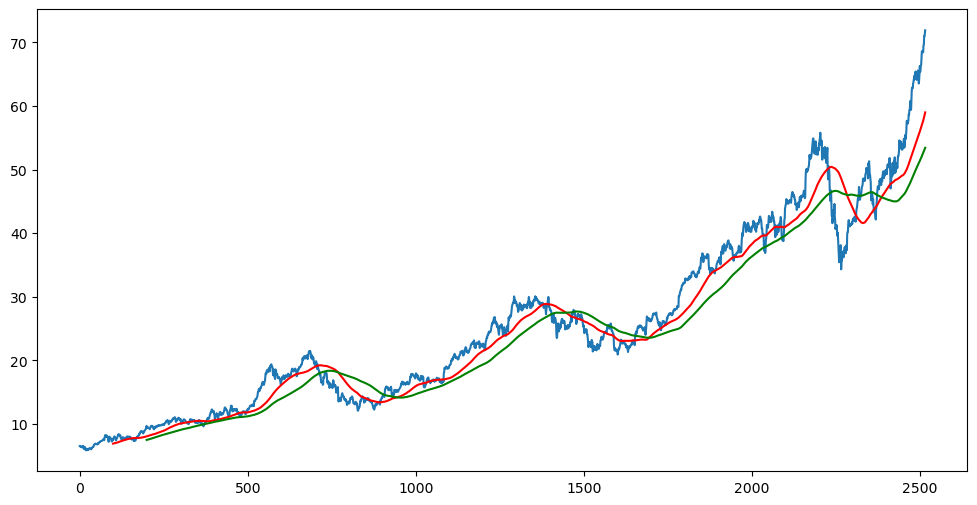

In [23]:
#Visualizing the Price Action along with Moving Average for 100 and 200 days
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [24]:
df.shape

(2516, 5)

# **Splitting data into Training and Testing**

In [25]:
# 70% for training and 30% for testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(755, 1)


In [26]:
data_training.head()

,Close
0,6.51522
1,6.52639
2,6.42221
3,6.41085
4,6.45401


In [27]:
data_testing.head()

,Close
1761,27.0973
1762,27.1761
1763,27.1462
1764,27.2867
1765,27.5858


## Scale the data between 0 and 1 through MinMax Scaler



In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [31]:
#Fit the training data to our model and we convert our training data into an array
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02760483],
       [0.02806591],
       [0.02376554],
       ...,
       [0.89110796],
       [0.88637747],
       [0.88625364]])

In [32]:
data_training_array.shape

(1761, 1)

In [33]:
#The data for the past and the present will be in x_train and the predicted data will be in y_train
x_train = []
y_train = []

#For 100 days
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [34]:
x_train

array([[[0.02760483],
        [0.02806591],
        [0.02376554],
        ...,
        [0.06873325],
        [0.06679895],
        [0.0654409 ]],

       [[0.02806591],
        [0.02376554],
        [0.02329662],
        ...,
        [0.06679895],
        [0.0654409 ],
        [0.07702564]],

       [[0.02376554],
        [0.02329662],
        [0.02507819],
        ...,
        [0.0654409 ],
        [0.07702564],
        [0.08146181]],

       ...,

       [[0.77592099],
        [0.7912311 ],
        [0.79995732],
        ...,
        [0.8892587 ],
        [0.88184925],
        [0.88411543]],

       [[0.7912311 ],
        [0.79995732],
        [0.8041966 ],
        ...,
        [0.88184925],
        [0.88411543],
        [0.89110796]],

       [[0.79995732],
        [0.8041966 ],
        [0.7964982 ],
        ...,
        [0.88411543],
        [0.89110796],
        [0.88637747]]])

In [42]:
x_train.shape

(1661, 100, 1)

In [35]:
y_train

array([0.07702564, 0.08146181, 0.08641231, ..., 0.89110796, 0.88637747,
       0.88625364])

# ML Model

In [39]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [46]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

#Here the unit is 1 because we have to just predict the closing price
model.add(Dense(units = 1))

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_2 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_4 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_3 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_4 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_6 (LSTM)               (None, 120)              

In [48]:
#Here we are doing time series analysis that's why we keep loss as mean_squared_error
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs=50)


Epoch 1/50

52/52 [==============================] - 33s 388ms/step - loss: 0.0723
Epoch 2/50
52/52 [==============================] - 21s 396ms/step - loss: 0.0134
Epoch 3/50
52/52 [==============================] - 21s 408ms/step - loss: 0.0104
Epoch 4/50
52/52 [==============================] - 20s 389ms/step - loss: 0.0101
Epoch 5/50
52/52 [==============================] - 20s 389ms/step - loss: 0.0097
Epoch 6/50
52/52 [==============================] - 20s 393ms/step - loss: 0.0098
Epoch 7/50
52/52 [==============================] - 22s 415ms/step - loss: 0.0082
Epoch 8/50
52/52 [==============================] - 22s 419ms/step - loss: 0.0075
Epoch 9/50
52/52 [==============================] - 22s 421ms/step - loss: 0.0080
Epoch 10/50
52/52 [==============================] - 21s 408ms/step - loss: 0.0079
Epoch 11/50
52/52 [==============================] - 25s 479ms/step - loss: 0.0075
Epoch 12/50
52/52 [==============================] - 24s 465ms/step - loss: 0.0068
Epoch 13/50

# Save the Model

In [52]:
model.save('keras_model.h5')

# Predicting the price

In [53]:
data_testing.head()

,Close
1761,27.0973
1762,27.1761
1763,27.1462
1764,27.2867
1765,27.5858


In [55]:
#For predicting the next 100 values we need values from the training data, so we append the training data into the testing data
past_100_days = data_training.tail(100)
past_100_days

,Close
1661,25.3288
1662,25.1423
1663,25.1243
1664,25.1822
1665,25.4802
...,...
1756,27.2100
1757,27.2649
1758,27.4343
1759,27.3197


In [58]:
final_df = past_100_days._append(data_testing, ignore_index=True)

In [59]:
final_df.head()

,Close
0,25.3288
1,25.1423
2,25.1243
3,25.1822
4,25.4802


In [61]:
#We scale the above data
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02763353],
       [0.02374105],
       [0.02336536],
       [0.02457381],
       [0.03079344],
       [0.03038019],
       [0.02952447],
       [0.02892338],
       [0.03027583],
       [0.02617672],
       [0.02784016],
       [0.02382453],
       [0.0214953 ],
       [0.01843557],
       [0.01797849],
       [0.01392112],
       [0.01450134],
       [0.01756107],
       [0.02232598],
       [0.02215901],
       [0.02544831],
       [0.01161068],
       [0.        ],
       [0.01127674],
       [0.02346972],
       [0.04203052],
       [0.06032209],
       [0.05732497],
       [0.05074844],
       [0.0507067 ],
       [0.05058356],
       [0.05574293],
       [0.04654706],
       [0.04731512],
       [0.0483566 ],
       [0.05262268],
       [0.04402999],
       [0.04814997],
       [0.04567256],
       [0.04787865],
       [0.04814997],
       [0.05237223],
       [0.05320708],
       [0.06277654],
       [0.06402464],
       [0.06912349],
       [0.06731187],
       [0.070

In [62]:
input_data.shape

(855, 1)

In [63]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [64]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [65]:
#Making Predictions
y_predicted = model.predict(x_test)

24/24 [==============================] - 4s 120ms/step


In [66]:
y_predicted.shape

(755, 1)

In [67]:
y_test

array([0.06454434, 0.06618899, 0.06556494, 0.06849735, 0.07473994,
       0.08000576, 0.08062981, 0.08375006, 0.08137909, 0.080275  ,
       0.08495642, 0.08491468, 0.08391703, 0.08495642, 0.08541559,
       0.08478945, 0.09415438, 0.09442571, 0.09448832, 0.09284367,
       0.09159557, 0.12765482, 0.12669892, 0.12919512, 0.13533336,
       0.14120235, 0.14361507, 0.1485052 , 0.14698577, 0.1527692 ,
       0.16113648, 0.16359094, 0.1628187 , 0.1646512 , 0.16945785,
       0.17145731, 0.16843933, 0.16927001, 0.17053898, 0.17083118,
       0.18462707, 0.1804236 , 0.18458533, 0.1823375 , 0.18325374,
       0.18063232, 0.17905027, 0.18133985, 0.1816717 , 0.1805697 ,
       0.18789342, 0.18897664, 0.18552036, 0.19276477, 0.18483579,
       0.19255606, 0.19007864, 0.18876793, 0.18986993, 0.20422726,
       0.20574669, 0.20485131, 0.20349886, 0.20370757, 0.20899426,
       0.20533135, 0.20349886, 0.20189594, 0.20106527, 0.19353283,
       0.19442612, 0.19074444, 0.19457222, 0.19147284, 0.18891

In [68]:
y_predicted

array([[0.12085019],
       [0.12149067],
       [0.12216736],
       [0.12286854],
       [0.12358101],
       [0.12429379],
       [0.1249999 ],
       [0.12569654],
       [0.12638356],
       [0.12706383],
       [0.12773988],
       [0.12841357],
       [0.12908849],
       [0.12976755],
       [0.13045232],
       [0.13114358],
       [0.1318412 ],
       [0.13254432],
       [0.13325627],
       [0.13398054],
       [0.13472024],
       [0.13547647],
       [0.13625228],
       [0.13706946],
       [0.13795291],
       [0.13892856],
       [0.14002176],
       [0.14125796],
       [0.14265949],
       [0.144244  ],
       [0.14602174],
       [0.14799847],
       [0.1501767 ],
       [0.15253696],
       [0.15501289],
       [0.15761788],
       [0.16035359],
       [0.16321403],
       [0.16618471],
       [0.16924547],
       [0.1723742 ],
       [0.17554498],
       [0.17873397],
       [0.18192115],
       [0.18508622],
       [0.18820725],
       [0.19125092],
       [0.194

In [69]:
#We find the factor by how much they we were scaled down
scaler.scale_

array([0.02087125])

In [70]:
#We convert them to the original value
scale_factor = 1/0.02087125
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

# Plot the actual and predicted price

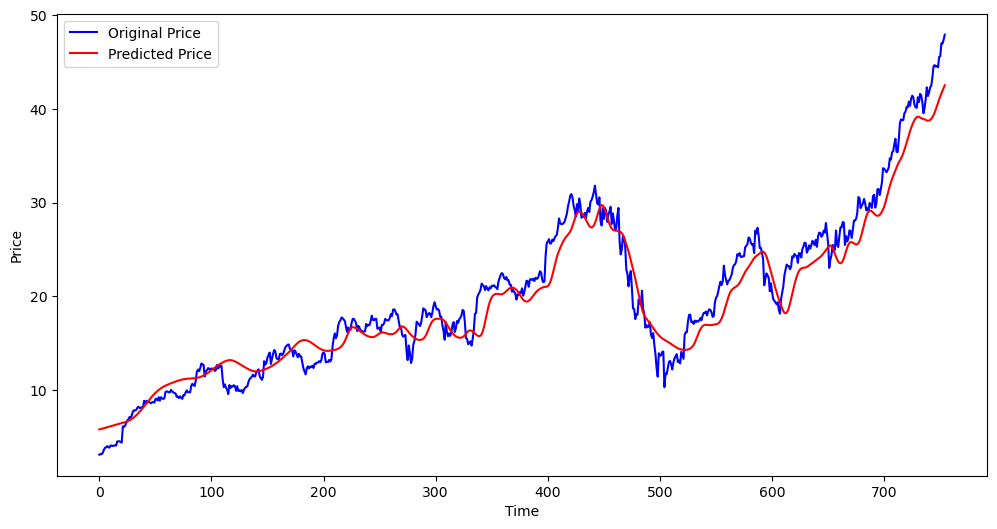

In [73]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()